<a href="https://colab.research.google.com/github/tejeshbhalla/tensorflow_projects/blob/master/Project_Distracted_Driver_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#import statements

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import cv2
import random
import glob
import os
import time

downloading the data

In [1]:
r=requests.get('https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/5048/868335/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1605023385&Signature=le8vZoC4e60Te72mewlmhEMFkvqcc%2FygzizQGQgKeJPBg57E%2Fa8rx%2FVmh3QKWLF9C0NC4mGrEn4bubXdpzM8s5ywMqGIMxow4hhIdpjlEHzf3u%2Ftp2cX8X23BzXSfa8DJpQOWC8OHOhv4JLAhga6bq%2FLX%2FNYsX7RNtU2iXkYkTE6juBXlXh7ZcQHn3Jw%2BzyY%2F3IG8ti9TnKHwLw3glfmpjLb3j1m7FIkWu6BfKt%2Flk9l5fXwbiSWiJmj1iZhjo1iPZnKHQfsAJ2TG%2F79VQl4rFu%2BYTuDK88BT0BMayUOVPsoKDm84O0Mz3wYO9QG%2BEmwnwVwDL1SSgT37r0zPojogQ%3D%3D&response-content-disposition=attachment%3B+filename%3Dstate-farm-distracted-driver-detection.zip')

In [ ]:
with open('data.zip','wb') as file:
  file.write(r.content)

In [ ]:
!unzip data.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/imgs/train/c7/img_56661.jpg  
  inflating: data/imgs/train/c7/img_56699.jpg  
  inflating: data/imgs/train/c7/img_56717.jpg  
  inflating: data/imgs/train/c7/img_56724.jpg  
  inflating: data/imgs/train/c7/img_56768.jpg  
  inflating: data/imgs/train/c7/img_56779.jpg  
  inflating: data/imgs/train/c7/img_56849.jpg  
  inflating: data/imgs/train/c7/img_56899.jpg  
  inflating: data/imgs/train/c7/img_56938.jpg  
  inflating: data/imgs/train/c7/img_5706.jpg  
  inflating: data/imgs/train/c7/img_57076.jpg  
  inflating: data/imgs/train/c7/img_57122.jpg  
  inflating: data/imgs/train/c7/img_57137.jpg  
  inflating: data/imgs/train/c7/img_5715.jpg  
  inflating: data/imgs/train/c7/img_57278.jpg  
  inflating: data/imgs/train/c7/img_57321.jpg  
  inflating: data/imgs/train/c7/img_57345.jpg  
  inflating: data/imgs/train/c7/img_57355.jpg  
  inflating: data/imgs/train/c7/img_5741.jpg  
  inflating: data/imgs/train/c7/img_5743

reading the csv and plotting some sample images


In [2]:
df=pd.read_csv('/content/data/driver_imgs_list.csv')
df.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [3]:
df['image_path']='/content/data/imgs/train'+'/'+df['classname']+'/'+df['img']

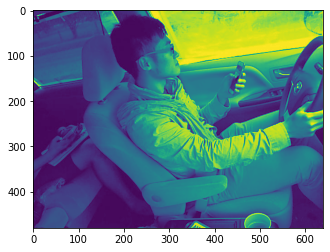

In [4]:
plt.imshow(cv2.imread(df['image_path'][1000],0))

**Plotting** some images from all classes 


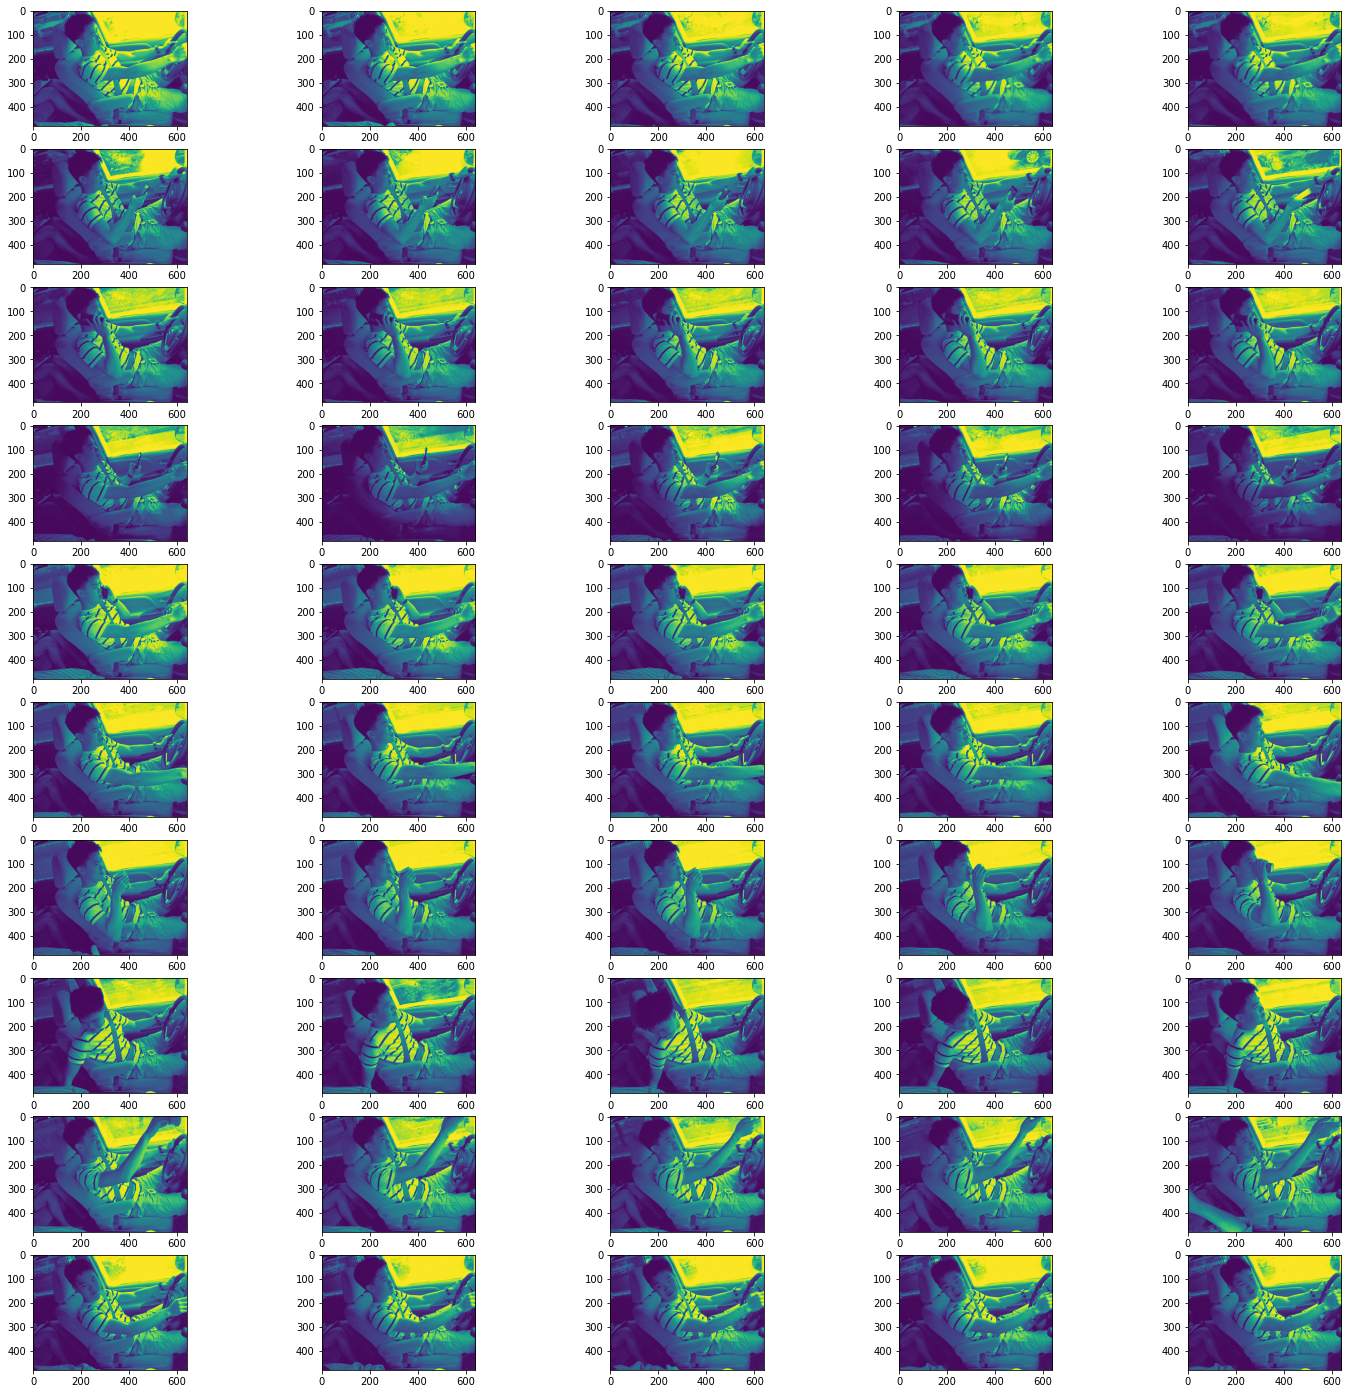

In [ ]:
sub_images=[]
for i in df['classname'].unique():
  images=df[df['classname']==i]['image_path'][:5]
  sub_images.append((images.values,i))

fig,axes=plt.subplots(10,5,figsize=(25,25))
row=0
try:
  for images,class_ in sub_images:
    for j in range(0,len(images)):
      axes[row,j].imshow(cv2.imread(images[j],0))
    row+=1
except Exception as e:
  pass

plt.savefig('output.jpg')
  


In [ ]:
## Extracting the data and importing libraries

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
img_gen=ImageDataGenerator(rescale=1/255,validation_split=0.2)

train_gen=img_gen.flow_from_directory('/content/data/imgs/train',target_size=(480,640),subset='training',batch_size=32)
test_gen=img_gen.flow_from_directory('/content/data/imgs/train',target_size=(480,640),subset='validation',batch_size=32)


Found 17943 images belonging to 10 classes.
Found 4481 images belonging to 10 classes.


In [7]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D,Input,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
model=Sequential()
model.add(Input(shape=(480,640,3)))
model.add(Conv2D(30,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(50,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D())

model.add(Dropout(0.2))

model.add(Conv2D(100,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D())

model.add(Dropout(0.2))

model.add(Conv2D(200,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D())

model.add(Dropout(0.2))

model.add(Conv2D(300,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D())

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dropout(0.3))

model.add(Dense(256,activation='relu'))

model.add(Dropout(0.1))

model.add(Dense(10,activation='softmax'))

#compiling 
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 476, 636, 30)      2280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 238, 318, 30)      0         
_________________________________________________________________
dropout (Dropout)            (None, 238, 318, 30)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 234, 314, 50)      37550     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 117, 157, 50)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 117, 157, 50)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 113, 153, 100)     1

In [10]:
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01)
r=model.fit_generator(train_gen,epochs=30,steps_per_epoch=17943/1000,validation_data=test_gen)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
18/17 [==============================] - 48s 3s/step - loss: 16.0399 - accuracy: 0.1111 - val_loss: 2.3485 - val_accuracy: 0.1033
Epoch 2/30
18/17 [==============================] - 48s 3s/step - loss: 2.3235 - accuracy: 0.1233 - val_loss: 2.3011 - val_accuracy: 0.1047
Epoch 3/30
18/17 [==============================] - 48s 3s/step - loss: 2.3059 - accuracy: 0.1111 - val_loss: 2.2992 - val_accuracy: 0.1047
Epoch 4/30
18/17 [==============================] - 47s 3s/step - loss: 2.2972 - accuracy: 0.1042 - val_loss: 2.2864 - val_accuracy: 0.1109
Epoch 5/30
18/17 [==============================] - 46s 3s/step - loss: 2.3577 - accuracy: 0.1562 - val_loss: 2.3893 - val_accuracy: 0.1109
Epoch 6/30
18/17 [==============================] - 46s 3s/step - loss: 2.2859 - accuracy: 0.1649 - val_loss: 2.2230 - val_accuracy: 0.1988
Epoch 7/30
18/17 [==============================] - 46s 3s/step - loss: 2.3090 - ac

In [14]:
#saving the model
model.save('model.h5')

In [26]:
df = pd.DataFrame({'img':[],'c0':[], 'c1':[],'c2':[], 'c3':[], 'c4':[],'c5':[], 'c6':[], 'c7':[], 'c8':[], 'c9':[]})
def _submission(pathPropagate_Images,df):
    j=0
    a=time.time()
    for imgs in glob.glob(os.path.join(pathPropagate_Images,'*.jpg')):
        j+=1
        img_cv = cv2.imread(imgs)
        img_cv_r = cv2.resize(img_cv,(480,640))
        img_cv_predict = np.reshape(img_cv_r,[1,480,640,3])
        arr_predict = model.predict(img_cv_predict,batch_size = 1)
        #print(imgs.split('/')[-1])
        df = df.append(
            {
                'img':imgs.split('/')[-1],
                'c0':round(arr_predict[0][0],2), 
                'c1':round(arr_predict[0][1],2),
                'c2':round(arr_predict[0][2],2),
                'c3':round(arr_predict[0][3],2),
                'c4':round(arr_predict[0][4],2),
                'c5':round(arr_predict[0][5],2),
                'c6':round(arr_predict[0][6],2),
                'c7':round(arr_predict[0][7],2),
                'c8':round(arr_predict[0][8],2),
                'c9':round(arr_predict[0][9],2)
            },
            ignore_index=True
        )   
        if j%1000==0 and j!=0:
          b=time.time()
          print(f'this much time was taken for {j} images , ({b-a})')
          a=time.time()
          print('1000 images done')
    return df

In [27]:
path='/content/data/imgs/test'
df=_submission(path,df)

this much time was taken for 1000 images , (46.08457279205322)
1000 images done
this much time was taken for 2000 images , (45.63140678405762)
1000 images done
this much time was taken for 3000 images , (46.19350862503052)
1000 images done
this much time was taken for 4000 images , (46.76189303398132)
1000 images done
this much time was taken for 5000 images , (47.22306847572327)
1000 images done
this much time was taken for 6000 images , (46.641987323760986)
1000 images done
this much time was taken for 7000 images , (46.20937395095825)
1000 images done
this much time was taken for 8000 images , (46.54468822479248)
1000 images done
this much time was taken for 9000 images , (46.12526774406433)
1000 images done
this much time was taken for 10000 images , (45.864296674728394)
1000 images done
this much time was taken for 11000 images , (45.77329421043396)
1000 images done
this much time was taken for 12000 images , (45.95434617996216)
1000 images done
this much time was taken for 13000 

**plots for checking the loss and the acc divergence inbetween the train data and the validation data**

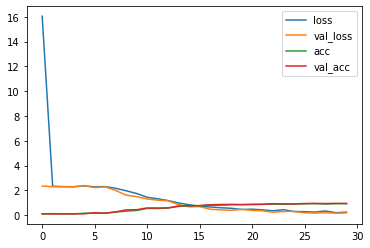

In [13]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')

plt.legend()

In [30]:
df.to_csv('submisson.csv',index=False)

**Transfer** **Learning** Time

In [37]:
from keras.applications import VGG16
from keras.models import Model

In [43]:

model1=VGG16(include_top=False,input_shape=(480,640,3))
model1.trainable=False
model=Flatten()(model1.layers[-1].output)
model=Dense(256,activation='relu')(model)
model=Dropout(0.2)(model)
output=Dense(10,activation='softmax')(model)

model=Model(model1.inputs,output)
model.compile(loss='categorical_crossentropy',metrics=['acc'],optimizer='adam')




In [44]:
r=model.fit_generator(train_gen,epochs=30,steps_per_epoch=17943/1000,validation_data=test_gen)

Epoch 1/30
18/17 [==============================] - 121s 7s/step - loss: 24.7211 - acc: 0.1458 - val_loss: 6.2482 - val_acc: 0.1812
Epoch 2/30
18/17 [==============================] - 119s 7s/step - loss: 2.7609 - acc: 0.2708 - val_loss: 1.9294 - val_acc: 0.3086
Epoch 3/30
18/17 [==============================] - 119s 7s/step - loss: 1.9089 - acc: 0.2951 - val_loss: 1.7250 - val_acc: 0.3412
Epoch 4/30
18/17 [==============================] - 119s 7s/step - loss: 1.7210 - acc: 0.3663 - val_loss: 1.6247 - val_acc: 0.4256
Epoch 5/30
18/17 [==============================] - 119s 7s/step - loss: 1.6370 - acc: 0.3698 - val_loss: 1.4135 - val_acc: 0.4811
Epoch 6/30
18/17 [==============================] - 119s 7s/step - loss: 1.4492 - acc: 0.4514 - val_loss: 1.2043 - val_acc: 0.5532
Epoch 7/30
18/17 [==============================] - 119s 7s/step - loss: 1.3750 - acc: 0.4896 - val_loss: 1.1600 - val_acc: 0.6170
Epoch 8/30
18/17 [==============================] - 119s 7s/step - loss: 1.3599 - 

In [45]:
##looks like vgg with training layer worked out pretty well with almost no changes we were able to total around 97% testing accuracy thats way too sick !!! 
model.save('model1.h5')
